# Schmidt Decomposition

Es una forma de representar multiples qubits en un solo estado, sin embargo existen qubits que no se pueden representar así estos son aquellos que están entrelazados.

Digamos que tenemos dos qubits $\ket{\psi}, \ket{\phi}$ en su representación de bases, y quiero representar estos dos qubits juntos. Y esto lo podemos lograr así:

$$\ket{\psi\phi}=?$$

Si sabemos que :

$$\ket{\psi} \epsilon (H_1, \ket{\phi} \epsilon H_2)$$

Entonces debe existir un 

$$\ket{\psi\phi}, \ket{w}  \epsilon (H_1 \otimes H_2)$$

La idea es representar un qubit d ealta dimensionalidad en sus consituentes o un qubit de menor dimensionalidad

Sabemos que de nuestros kets tenemos:

$$\ket{\psi} = \sum_{i=0}^na_iA_i$$
$$\ket{\phi} = \sum_{j=0}^nb_iB_i$$

Y si quisieramos entonces representar nuestros qubits en un mismo estado podemos:

$$\ket{\psi\phi} = \sum_{0\leq i\leq m, 1\leq j \leq m }^n(a_i*bj)A_i\otimes B_i$$

Nuestros productos tensoriales nos permitirán representar esto, es decir lo anterior representa nuestro qubit en alta dimensionalidad, mostrando la información junta. Operando por sus bases correspondientes apra los dos vectores:

$$\ket{\psi\phi} = a_0b_0\ket{0} \otimes \ket{0} + a_0b_1\ket{0} \otimes \ket{1} + a_1b_0\ket{1} \otimes \ket{0} + a_1b_1\ket{1} \otimes \ket{1}$$

Una vez resolvemos los productos tensoriales para neustras bases obtenemos una base para nuestros qubits representados en un mismo estado

$$\ket{\psi\phi} = a_0b_0\ket{00} + a_0b_1\ket{01} + a_1b_0\ket{10} + a_1b_1\ket{11}$$


## Estados de Bell

¿Es posible representar todos los qubits así?

No, es imposible para algunso estados

Como estos:

$$\ket{B_0}= \frac{1}{\sqrt{2}}\ket{00} + \frac{1}{\sqrt{2}}\ket{11}$$
$$\ket{B_0}= \frac{1}{\sqrt{2}}\ket{01} + \frac{1}{\sqrt{2}}\ket{10}$$

$$\ket{B_0}= \frac{1}{\sqrt{2}}\ket{00} - \frac{1}{\sqrt{2}}\ket{11}$$
$$\ket{B_0}= \frac{1}{\sqrt{2}}\ket{01} - \frac{1}{\sqrt{2}}\ket{10}$$

Para entender esto físicamente, tenemso dos esferas que cada una posee nuestro qubit., de acuerdo a los estaos de Bell, si yo en una sfera tengo un $\ket{0}$ en la otra esfera tengo el mismo estado obligatoriamente, esto abre el concepto de qubits entrelazados.

In [2]:
from qiskit import *
import qiskit.visualization as viz
import numpy as np
import matplotlib.pyplot as plt

Revisemos:


-- Aquí será bueno mostrar la matriz de CNOT y también remitirse a la animación  seccion 2 numero 18. Para mostrar como a medida que los qubits van pasando por las compuertas este toma un estado positivo, gracias a la compuerta de Hadamard y cualquier medición que hagamos en un qubit, nos dará igual para el qubit entrelazado.


In [3]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure(0,0)
circuit.measure(1,1)

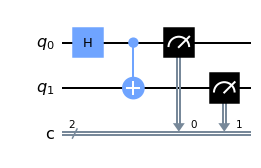

In [18]:
circuit.draw(output='mpl')


In [13]:
def entanglenment_random(circuit, backend, times=10):
    # outcomes
    measures = []
    for j in range(0,times):
        outcome =  execute(circuit,backend).result()
        values = outcome.get_counts()

        for i in values.keys():
            measures.append(i)  
    
    return measures

El siguiente loop demeustra como sin importar cuantas veces lo ejecute, siempre tendremos estas parejas en la que si un qubit es 0 o 1 el otro estado lo es también $\ket{0}$ y $\ket{1}$ respectivamente.

In [17]:
for i in range(0,10):
    r = entanglenment_random(circuit,backend)
    print(r)

['11', '11', '00', '11', '00', '00', '00', '11', '11', '11']
['11', '11', '00', '00', '00', '00', '11', '11', '00', '11']
['11', '00', '00', '11', '00', '11', '11', '00', '11', '00']
['11', '00', '00', '00', '11', '00', '11', '00', '00', '11']
['00', '11', '00', '00', '11', '00', '11', '11', '00', '00']
['00', '00', '11', '11', '11', '00', '00', '11', '00', '00']
['11', '00', '11', '11', '11', '00', '11', '11', '00', '00']
['00', '00', '11', '00', '11', '11', '11', '11', '11', '11']
['00', '11', '00', '00', '11', '11', '11', '00', '00', '00']
['11', '00', '00', '11', '11', '00', '00', '11', '00', '00']


Cada vez que ejecutamos la función, los valores que obtenemos si bien son aleatorios, ahora están entrelazados.

['11', '11', '11', '11', '11', '11', '11', '00', '11', '00']

# Bell Test (Curar y Ubicar)


El test de Bell demuestra que las medidas de un estado entrelazado no pueden ser explicados mediante ninguna teoría de la varaible oculta y que deben de existir correlaciones más allá de lo clásico.

